In [1]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import os
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
import pandas as pd

census=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\datasets\census-income .csv",na_values='?')

In [3]:
census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Handling Numerical Columns
We select the numerical columns using the select_dtypes function.


In [5]:
num_cols=census.select_dtypes(include=['int'])
print(num_cols.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

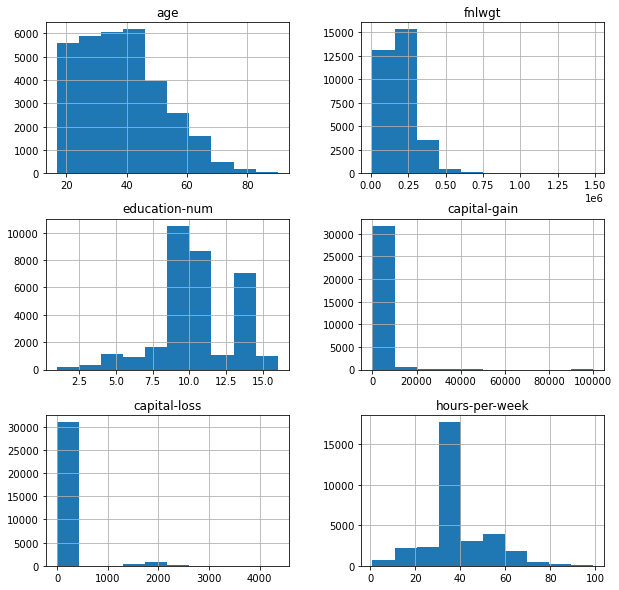

In [6]:
num_cols.hist(figsize=(10,10))


In [7]:
census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
cat_cols = census.select_dtypes(include=['object'])
print(cat_cols.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'annual_income'],
      dtype='object')


<AxesSubplot:xlabel='count', ylabel='workclass'>

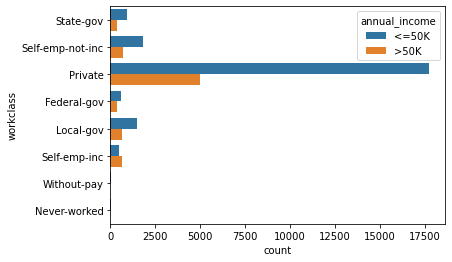

In [9]:
sns.countplot(y='workclass', hue='annual_income', data = cat_cols)

<AxesSubplot:xlabel='count', ylabel='occupation'>

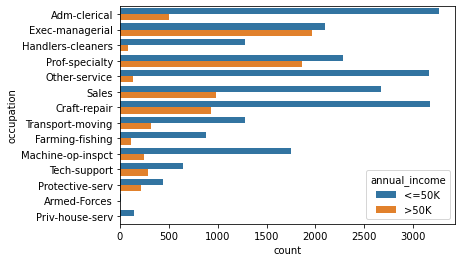

In [10]:
sns.countplot(y='occupation', hue='annual_income', data = cat_cols)


In [11]:
census['occupation'].nunique()

14

In [12]:
census.loc[(census.occupation=='Tech-support')&(census.annual_income== '>50K')].value_counts().count()

278

In [13]:
census.isnull().sum().sum()

4262

In [14]:
census.loc[(census['workclass']=='Private') & (census['native-country']!='United-States')].value_counts().sum()

2151

In [15]:
census.loc[(census['annual_income']=='<=50K' ) | (census['hours-per-week']>=40)].value_counts().sum()

29505

In [16]:
#● Rename the last column as Annual Income

census=census.rename(columns={'annual_income':'Annual_Income'},inplace=False)
census.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual_Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [17]:
census.loc[:,census.isnull().any()].columns

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [18]:
census.isnull().sum().sum()

4262

In [19]:
#● Remove the missing values from the dataset

In [20]:
census.dropna(inplace=True)

In [21]:
census.loc[:,census.isnull().any()].columns

Index([], dtype='object')

In [22]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  Annual_Income   30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
census.isnull().sum().sum()

0

In [24]:
census["Annual_Income"].value_counts()

<=50K    22654
>50K      7508
Name: Annual_Income, dtype: int64

In [25]:
col_list = list(census.columns)

In [26]:
col_list.remove('Annual_Income')

In [27]:
col_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

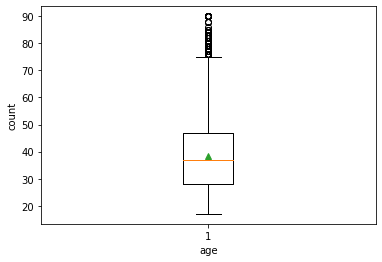

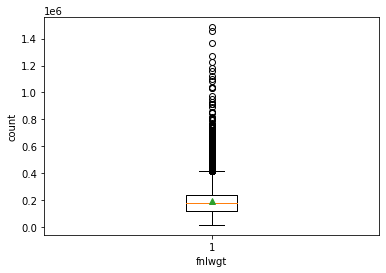

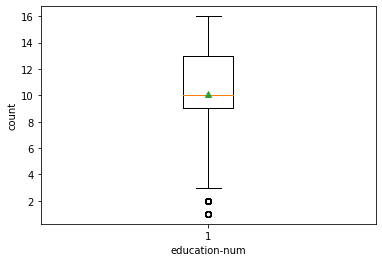

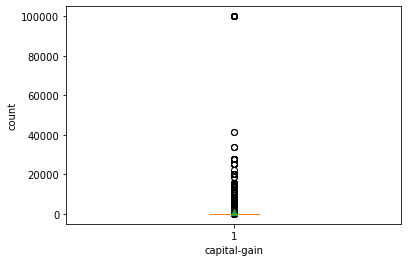

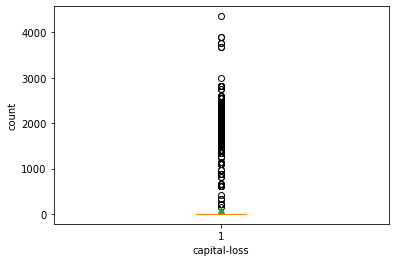

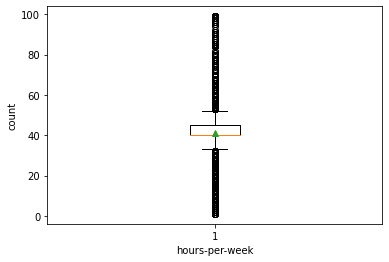

In [28]:
#Outlier detection
  #boxplot
for i in col_list:
    if(census[i].dtype =='int64' or census[i].dtype == 'float64'):
        plt.boxplot(census[i],showmeans = True)
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

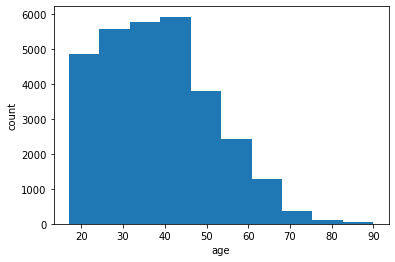

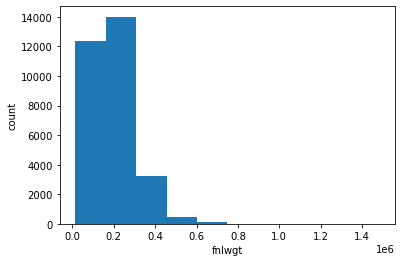

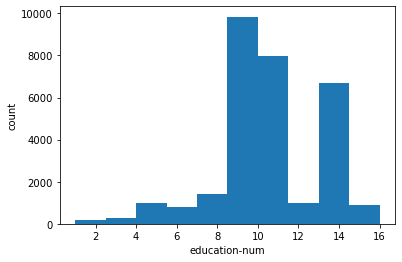

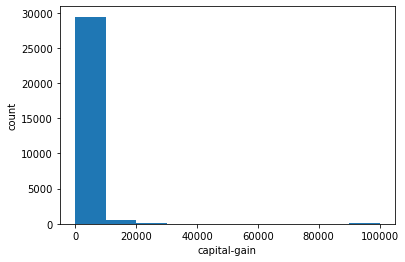

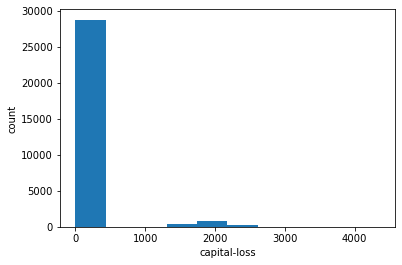

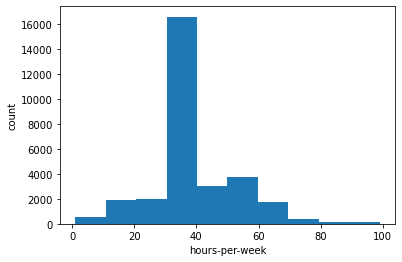

In [29]:
#checking the distribution of data
for i in col_list:
  if(census[i].dtypes == 'int64' or census[i].dtypes == 'float64'):
    plt.hist(census[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [30]:
census.dtypes


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Annual_Income     object
dtype: object

In [31]:
census["Annual_Income"]=census["Annual_Income"].map({"<=50K":0,">50K":1})

In [32]:
census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Annual_Income      int64
dtype: object

In [33]:
#● Change the labels of categorical data into numerical data using LabelEncoder.

In [34]:
#● Change the labels of categorical data into numerical data using LabelEncoder.

from sklearn import preprocessing

categorical=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
for feature in categorical:
    le=preprocessing.LabelEncoder()
    for i in col_list:
        census[i]=le.fit_transform(census[i])
    

In [35]:
census.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
Annual_Income     int64
dtype: object

In [36]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual_Income
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0


In [37]:
X=census.drop(['Annual_Income'],axis=1)
y=census['Annual_Income']

In [38]:
#● Split the dataset into a train and test of proportions 70:30 and set the random_state to 0.

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [40]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15977,27,2,13658,11,8,0,11,1,4,0,0,18,39,38
13574,15,2,2725,15,9,2,13,0,4,1,0,0,59,38
23210,13,1,17855,11,8,0,10,3,4,0,0,0,31,38
9284,6,2,4386,15,9,2,2,0,4,1,0,0,59,38
8841,37,1,12303,15,9,2,10,0,4,1,0,0,51,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169,49,1,18960,10,15,0,9,1,4,0,51,0,39,38
21206,33,2,7857,12,13,2,3,0,4,1,0,0,49,38
10646,33,2,2284,9,12,0,11,1,4,1,0,0,44,38
11687,32,4,15725,9,12,2,3,0,4,1,0,0,59,38


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [42]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.418210,-0.204511,0.678476,0.170452,-0.434574,-1.721729,1.251744,-0.266868,0.382579,-1.438780,-0.282504,1.582712,-0.074863,0.265946
1,-0.494731,-0.204511,-1.250513,1.222721,-0.042490,-0.387728,1.748265,-0.890070,0.382579,0.695033,-0.282504,-0.208140,1.637212,0.265946
2,-0.646888,-1.261772,1.418984,0.170452,-0.434574,-1.721729,1.003483,0.979538,0.382579,-1.438780,-0.282504,-0.208140,-0.759693,0.265946
3,-1.179437,-0.204511,-0.957451,1.222721,-0.042490,-0.387728,-0.982600,-0.890070,0.382579,0.695033,-0.282504,-0.208140,1.637212,0.265946
4,1.178994,-1.261772,0.439404,1.222721,-0.042490,-0.387728,1.003483,-0.890070,0.382579,0.695033,-0.282504,-0.208140,0.952382,0.265946


In [43]:
X_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.418210,-0.204511,-1.262511,0.170452,-0.434574,0.946273,1.251744,-0.266868,-3.217507,-1.438780,-0.282504,-0.20814,-0.074863,0.265946
1,-1.331594,-0.204511,1.312768,1.222721,-0.042490,0.946273,-1.479121,0.979538,0.382579,0.695033,-0.282504,-0.20814,-1.786938,0.265946
2,-0.190418,-0.204511,0.114406,1.222721,-0.042490,-0.387728,1.748265,-0.890070,0.382579,0.695033,-0.282504,-0.20814,-0.074863,0.265946
3,-0.646888,1.910009,-1.517992,-0.618749,0.349594,-1.721729,-0.982600,-0.266868,0.382579,0.695033,-0.282504,-0.20814,0.695570,0.265946
4,0.266053,1.910009,-0.646744,1.222721,-0.042490,-0.387728,-0.982600,-0.890070,0.382579,0.695033,-0.282504,-0.20814,-0.074863,-4.861988


In [44]:
y_train.head()

15977    0
13574    0
23210    0
9284     0
8841     0
Name: Annual_Income, dtype: int64

In [45]:
y_test.head()

2135     0
15639    0
29059    0
27523    0
9280     0
Name: Annual_Income, dtype: int64

In [46]:
X_train.shape

(21113, 14)

In [47]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [48]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [49]:
np.unique(y)

array([0, 1], dtype=int64)

In [50]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [51]:
np.unique(y_test)

array([0, 1], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
y_pred = log_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print('The Accuracy for Test Set is {}'.format(test_acc*100))

The Accuracy for Test Set is 81.30180130401149


In [53]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
y_test

2135     0
15639    0
29059    0
27523    0
9280     0
        ..
16826    0
25246    0
18980    1
953      0
30925    0
Name: Annual_Income, Length: 9049, dtype: int64

In [55]:
log_model.classes_


array([0, 1], dtype=int64)

In [56]:
log_model.intercept_

array([-1.62151825])

In [57]:
log_model.coef_

array([[ 0.50582305, -0.11576016,  0.03509428,  0.06654074,  0.86209191,
        -0.33022612, -0.01067867, -0.20882353,  0.08315792,  0.42101031,
         0.6479142 ,  0.30312046,  0.34529571,  0.01210541]])

Text(0.5, 33.0, 'Predicted Values')

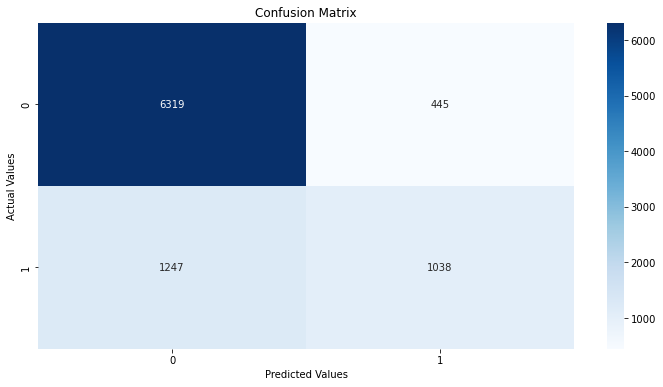

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report as cls ,accuracy_score as acc, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [59]:
print(acc(y_test,y_pred))
print(cls(y_test,y_pred))

0.8130180130401149
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6764
           1       0.70      0.45      0.55      2285

    accuracy                           0.81      9049
   macro avg       0.77      0.69      0.72      9049
weighted avg       0.80      0.81      0.80      9049



In [60]:
y_pred_prob=log_model.predict_proba(X_test) 
y_pred_prob

array([[0.96106309, 0.03893691],
       [0.96148143, 0.03851857],
       [0.78490945, 0.21509055],
       ...,
       [0.26008397, 0.73991603],
       [0.99103128, 0.00896872],
       [0.94311049, 0.05688951]])

In [61]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.961063,0.038937
1,0.961481,0.038519
2,0.784909,0.215091
3,0.732318,0.267682
4,0.797060,0.202940
...,...,...
9044,0.972164,0.027836
9045,0.942423,0.057577
9046,0.260084,0.739916
9047,0.991031,0.008969


In [62]:
log_model.fit(X_train,y_train)
print(log_model.score(X_test,y_test))

0.8130180130401149


In [63]:
y_pred1 = log_model.predict_proba(X_test)[:,1]
y_pred1

array([0.03893691, 0.03851857, 0.21509055, ..., 0.73991603, 0.00896872,
       0.05688951])

In [64]:
y_pred0 = log_model.predict_proba(X_test)[:,0]
y_pred0

array([0.96106309, 0.96148143, 0.78490945, ..., 0.26008397, 0.99103128,
       0.94311049])

In [65]:
print('Model accuracy score: {0:0.4f}'. format(acc(y_test, y_pred)))

Model accuracy score: 0.8130


In [66]:
print('Training set score: {:.4f}'.format(log_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(log_model.score(X_test, y_test)))

Training set score: 0.8218
Test set score: 0.8130


The training-set accuracy score is 0.8218 while the test-set accuracy to be 0.8130. These two values are quite comparable. So, there is no sign of overfitting.

In [67]:
y_test.value_counts()

0    6764
1    2285
Name: Annual_Income, dtype: int64

In [68]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6319  445]
 [1247 1038]]

True Positives(TP) =  6319

True Negatives(TN) =  1038

False Positives(FP) =  445

False Negatives(FN) =  1247


In [70]:
from sklearn.metrics import classification_report as cls ,accuracy_score as acc
from sklearn.metrics import recall_score as recall,precision_score as precision

print(cls(y_test,y_pred))
print('Accuracy', acc(y_test,y_pred))
print('Recall', recall(y_test, y_pred,pos_label=1))
print('Precision', precision(y_test, y_pred,pos_label=1))



              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6764
           1       0.70      0.45      0.55      2285

    accuracy                           0.81      9049
   macro avg       0.77      0.69      0.72      9049
weighted avg       0.80      0.81      0.80      9049

Accuracy 0.8130180130401149
Recall 0.45426695842450765
Precision 0.6999325691166555


Text(0, 0.5, 'Frequency')

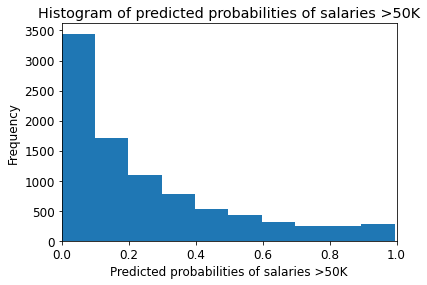

In [71]:
# plot histogram of predicted probabilities

plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

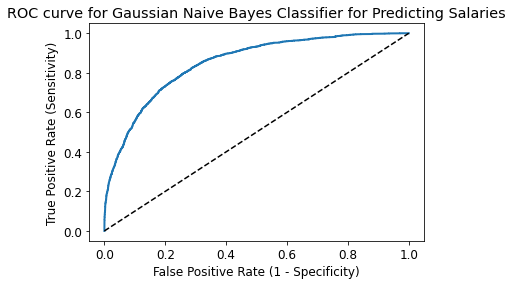

In [72]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


In [73]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8496


In [74]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(log_model, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8524


In [75]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81297348 0.83522727 0.81912879 0.8185694  0.80720038 0.81762198
 0.83467551 0.8237802  0.82188536 0.82662245]


In [76]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8218


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

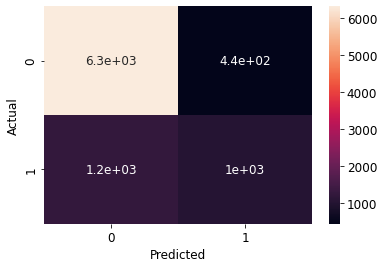

In [77]:
#confusion_matrix
import seaborn as sns
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

In [78]:
np.asarray(X)

array([[   22,     5,  2491, ...,     0,    39,    38],
       [   33,     4,  2727, ...,     0,    12,    38],
       [   21,     2, 13188, ...,     0,    39,    38],
       ...,
       [   41,     2,  7377, ...,     0,    39,    38],
       [    5,     2, 12060, ...,     0,    19,    38],
       [   35,     3, 16689, ...,     0,    39,    38]], dtype=int64)

In [79]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.421533
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Annual_Income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30148
Method:                           MLE   Df Model:                           13
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2488
Time:                        13:50:46   Log-Likelihood:                -12714.
converged:                       True   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0187      0.001     14.443      0.000       0.016       0.021
workclass        

In [80]:
#Calculate log loss
from sklearn.metrics import log_loss
log_loss(y_test,y_pred1)

0.39930414398268654

Logistic: ROC AUC=0.849614


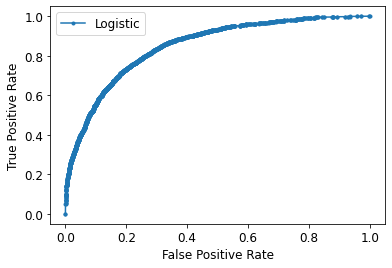

In [81]:
#roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

auc=roc_auc_score(np.array(y_test), y_pred1)
print('Logistic: ROC AUC=%3F' % (auc))
fpr,tpr, _ =roc_curve(np.array(y_test), y_pred1)
plt.plot(fpr,tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [82]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[6319  445]
 [1247 1038]]
Accuracy :  0.8130180130401149
Sensitivity :  0.9342105263157895
Specificity :  0.45426695842450765


In [83]:
from sklearn.metrics import precision_score,recall_score
pr= precision_score(
   y_test,
   y_pred,
   labels=None,
   pos_label=1,
   average='binary',
   sample_weight=None,
   zero_division='warn',
)
re= recall_score(
   y_test,
   y_pred,
   labels=None,
   pos_label=1,
   average='binary',
   sample_weight=None,
   zero_division='warn',)

In [84]:
pr,re

(0.6999325691166555, 0.45426695842450765)

In [85]:
from sklearn.metrics import precision_recall_curve
ys=log_model.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test,ys)
thr_90_recall=thresholds[np.argmin(recall >= 0.80)]
yscore=(ys>= thr_90_recall)
recall_score(y_test,yscore)

0.799562363238512

In [86]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds =precision_recall_curve(y_test,ys)

In [87]:
threshold_90_precision=thresholds[np.argmax(precision>=0.90)]

In [88]:
threshold_90_precision

1.5055612958530997

In [89]:
ys=log_model.decision_function(X_test)

In [90]:
yscore=(ys>=threshold_90_precision)

In [91]:
precision_score(y_test,yscore)

0.9

In [92]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.5509554140127388

In [93]:
print(cls(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6764
           1       0.70      0.45      0.55      2285

    accuracy                           0.81      9049
   macro avg       0.77      0.69      0.72      9049
weighted avg       0.80      0.81      0.80      9049



In [94]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,y_pred,average='binary')
print ('Precision : {}'.format(precision))
print ('Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))
print ('Support   : {}'.format(support))

Precision : 0.6999325691166555
Recall    : 0.45426695842450765
F-score   : 0.5509554140127388
Support   : None
